# 🧮 Matrix Operations & Visualizations

This notebook demonstrates various matrix operations using NumPy and visualizes them with Matplotlib. It includes:

- Matrix generation and heatmaps
- 3D surface plots
- Animated matrix transformations
- Interactive widgets for exploring operations


In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display, clear_output


## 🎲 Generate a Random Matrix
Use the slider and button below to create a random square matrix.


In [2]:
# Cell 2: Matrix creation widget
size_slider = widgets.IntSlider(value=5, min=2, max=10, description='Matrix Size:')
generate_button = widgets.Button(description='Generate Matrix')

output_matrix = widgets.Output()

def generate_matrix(change):
    size = size_slider.value
    matrix = np.random.rand(size, size)
    with output_matrix:
        clear_output()
        print(f"Generated {size}x{size} matrix:")
        print(matrix)

generate_button.on_click(generate_matrix)
display(size_slider, generate_button, output_matrix)


IntSlider(value=5, description='Matrix Size:', max=10, min=2)

Button(description='Generate Matrix', style=ButtonStyle())

Output()

## 🌡️ Heatmap of a Matrix
Visualize matrix values using a color-coded heatmap.


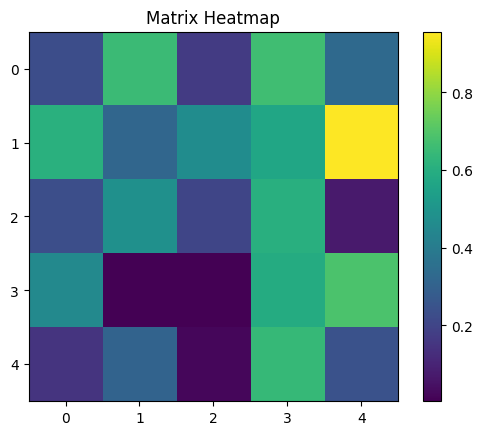

In [3]:
# Cell 3: Heatmap visualization
def plot_heatmap(matrix, title="Matrix Heatmap"):
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Example usage
matrix = np.random.rand(5, 5)
plot_heatmap(matrix)


## 🌄 3D Surface Plot
Explore the matrix as a 3D surface.


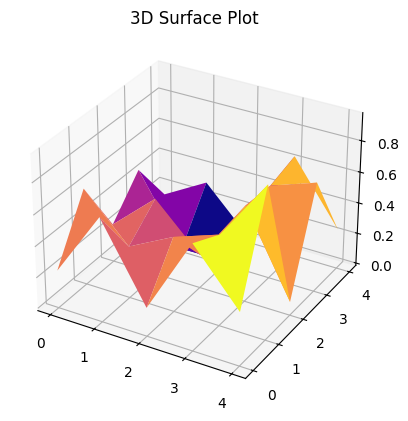

In [4]:
# Cell 4: 3D surface plot
def plot_3d_surface(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(range(matrix.shape[0]), range(matrix.shape[1]))
    ax.plot_surface(X, Y, matrix, cmap='plasma')
    ax.set_title("3D Surface Plot")
    plt.show()

plot_3d_surface(matrix)


## 🔄 Animated Matrix Rotation
Watch how a matrix transforms under rotation.


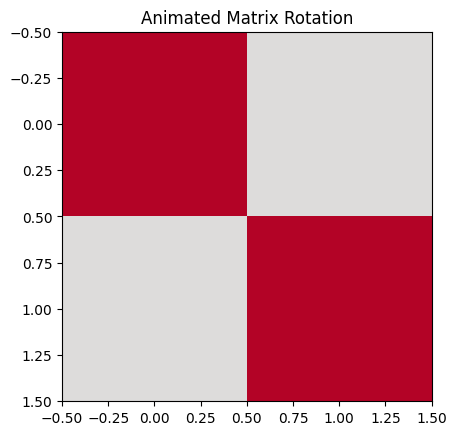

In [5]:
# Cell 5: Animated matrix rotation
fig, ax = plt.subplots()
base_matrix = np.array([[1, 0], [0, 1]])
im = ax.imshow(base_matrix, cmap='coolwarm', vmin=-1, vmax=1)

def update(frame):
    angle = np.radians(frame)
    rotation = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle),  np.cos(angle)]
    ])
    rotated = rotation @ base_matrix @ rotation.T
    im.set_array(rotated)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=range(0, 360, 5), blit=True)
plt.title("Animated Matrix Rotation")
plt.show()


## 🧠 Explore Matrix Operations
Choose an operation to apply to matrix A (2x2).


In [6]:
# Cell 6: Matrix operation selector
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

operation = widgets.Dropdown(
    options=['Add', 'Multiply', 'Transpose A', 'Determinant A', 'Inverse A', 'Eigen A'],
    description='Operation:'
)

output_op = widgets.Output()

def perform_operation(change):
    with output_op:
        clear_output()
        if operation.value == 'Add':
            print("A + B =\n", A + B)
        elif operation.value == 'Multiply':
            print("A @ B =\n", A @ B)
        elif operation.value == 'Transpose A':
            print("A.T =\n", A.T)
        elif operation.value == 'Determinant A':
            print("det(A) =", np.linalg.det(A))
        elif operation.value == 'Inverse A':
            print("inv(A) =\n", np.linalg.inv(A))
        elif operation.value == 'Eigen A':
            vals, vecs = np.linalg.eig(A)
            print("Eigenvalues:\n", vals)
            print("Eigenvectors:\n", vecs)

operation.observe(perform_operation, names='value')
display(operation, output_op)


Dropdown(description='Operation:', options=('Add', 'Multiply', 'Transpose A', 'Determinant A', 'Inverse A', 'E…

Output()

## ✅ Summary

In this notebook, you:

- Generated and visualized matrices
- Explored 3D and animated transformations
- Interacted with matrix operations using widgets

Feel free to extend this notebook with your own matrices or operations!
